In [1]:
from frequency import FrequencyData 
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
frequency = FrequencyData('../data-crawling/frequencyData/allFrequency_cleaned.csv')

In [4]:
print(len(frequency.data['recipeId']))

23688


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.cluster import DBSCAN, KMeans

def classification(frequency, eps=1):
    decomposing = ("decomposing", PCA(n_components=10))
    model = DBSCAN(eps=eps, min_samples=3)
    # model = KMeans(n_clusters=100)
    modeling = ("modeling", model)
    pipeline = Pipeline([decomposing, modeling])

    # scorer = {
    #     "accuracy": "accuracy",
    #     "precision": "precision",
    #     "recall": "recall",
    #     "f1": make_scorer(f1_score),
    # }

    # result = cross_validate(
    #     pipeline, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring=scorer, return_estimator=False, return_train_score=True
    # )

    # result = model.fit(frequency)
    result = pipeline.fit(frequency.data['frequency'])

    return result

In [23]:
clusterResult = classification(frequency, 0.2)
print(clusterResult)

Pipeline(steps=[('decomposing', PCA(n_components=20)),
                ('modeling', DBSCAN(eps=0.2, min_samples=3))])
181


In [6]:
from sklearn.manifold import TSNE
figResult = TSNE(n_components=2, random_state=42).fit_transform(frequency.data['frequency'])


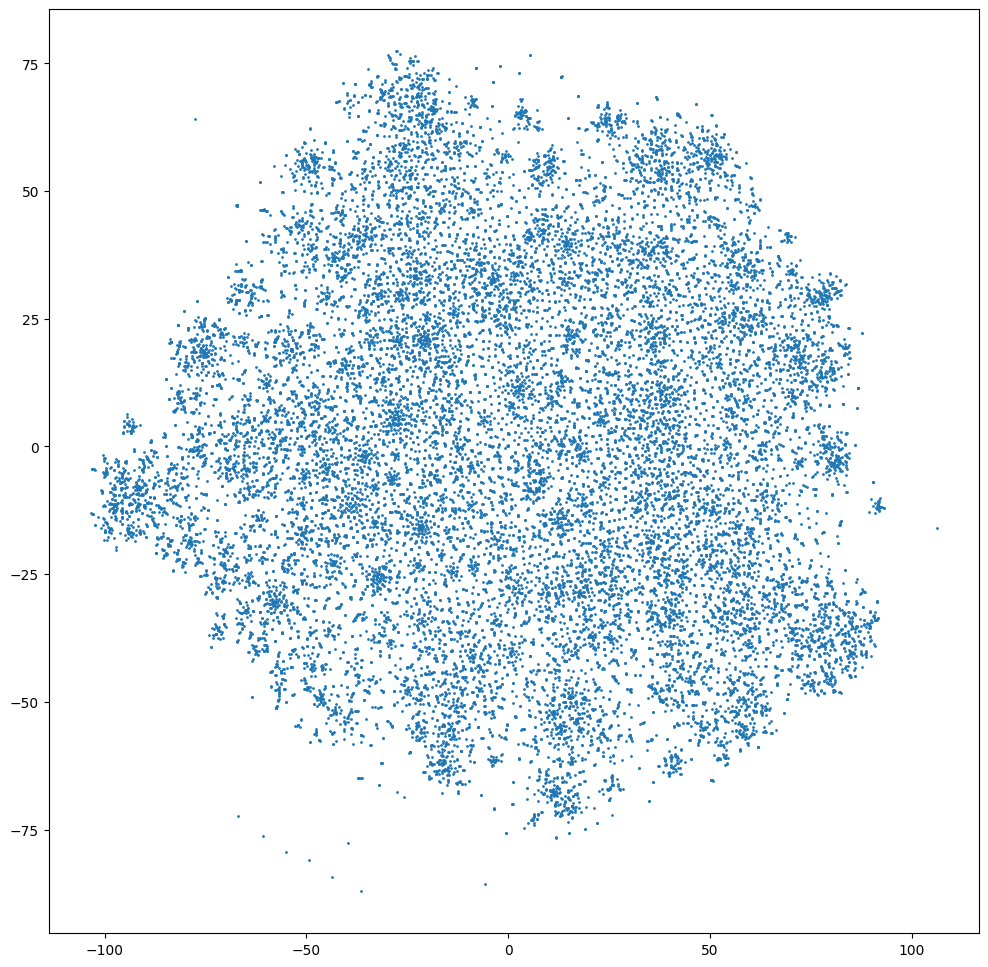

In [9]:
import itertools
colorDict = {
    0: 'red',
    1: 'orange',
    2: 'yellow',
    3: 'green',
    4: 'blue',
    5: 'purple',
}

# labelArr = (clusterResult.labels_+1)/max(clusterResult.labels_+1)

colorCycle = itertools.cycle(['red', 'orange', 'green', 'blue', 'purple'])
# colorArr = [next(colorCycle) for _ in range(max(clusterResult[1].labels_ + 2))]

plt.figure(figsize=(12,12))
# plt.scatter(figResult[:, 0], figResult[:, 1], s=1, c=[cm.rainbow(x) for x in labelArr])
plt.scatter(figResult[:, 0], figResult[:, 1], s=1)
# plt.scatter(figResult[:, 0], figResult[:, 1], s=1, c=[colorArr[x] for x in clusterResult[1].labels_+1])
# figure = plt.figure(figsize=(12,12))
# ax = figure.add_subplot(projection='3d')
# ax.set_zlim(-30, 30)
# ax.set_ylim(-30, 30)
# ax.set_xlim(-30, 30)
# ax.scatter(figResult[:, 0], figResult[:, 1], figResult[:, 2],s=2, c=[colorArr[x] for x in clusterResult[1].labels_+1])
# ax.scatter(figResult[:, 0], figResult[:, 1], figResult[:, 2])
plt.show()

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

cosineResult = cosine_similarity(frequency.data['frequency'])

0.5773502691896258
(array([1168, 1693, 2798, 3628, 4317, 4345, 6480, 6991, 7298, 7808, 8530,
       9331], dtype=int64),)
[0. 0. 0. ... 0. 0. 0.]
6900003
6901244
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

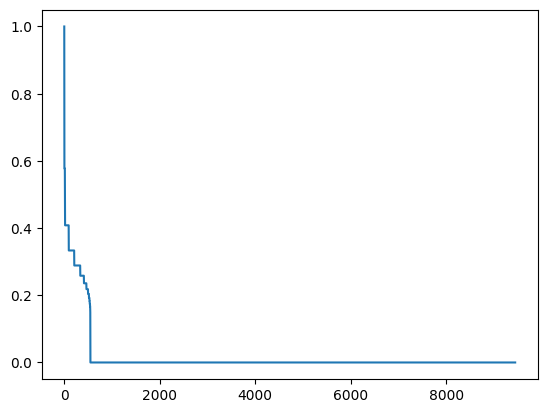

In [28]:
i = 3
sortedArr = sorted(cosineResult[i], reverse=True)
print(sortedArr[1])
print(np.where(cosineResult[i] == sortedArr[1]))
print(cosineResult[3253])
print(frequency.data['recipeId'][i])
print(frequency.data['recipeId'][1168])
print(frequency.data['frequency'][i])
print(frequency.data['frequency'][4344])
plt.plot(sortedArr)
plt.show()

In [106]:
print(clusterResult[1].labels_[3])
print(clusterResult[1].labels_[3253])

3
4
